# Data Science Job Posting Analysis Assignment

In this assignment I worked with a dataset that incudes information about Data Science scraped from Glassdoor.

This assignment deals with Pandas and visualization libraries (like matplotlib).

## Step 1: Load the Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


# Load the CSV file (check filename from the print above)
df = pd.read_csv("DataScientist.csv")  # adjust if needed

# Display the first rows of the dataset
print('Dataset overview:')
df.head()



Dataset overview:


,Unnamed: 0,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Unknown / Non-Applicable,-1,-1
1,1,1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Unknown / Non-Applicable,-1,-1
2,2,2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,-1.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,-1,Unknown,-1,-1,Unknown / Non-Applicable,-1,True
3,3,3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,"Zocdoc, Healthgrades",-1
4,4,4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"BBDO, Grey Group, Droga5",-1


In [2]:
# Shape of the data : Rows X column
print("column names---",df.columns)
print("shape of the data frame", df.shape)

# Useful column names:
col_names= df.columns[2:]
print(col_names)

column names--- Index(['Unnamed: 0', 'index', 'Job Title', 'Salary Estimate',
       'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Easy Apply'],
      dtype='object')
shape of the data frame (3909, 17)
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply'],
      dtype='object')


## Step 2: Data Cleaning
Data cleaning is required for this dataset due to inconsistences.

- Standardize column names (ex. lower case all column names)

- Parse `Salary Estimate` to extract numeric salary values (handle ranges, for example compute the average salary based on the low and high range provided)

- Deduplicate rows if necessary (duplicates are defined as repeated columns in each column)

- Determine columns with too many missing values. Note, some datasets have Nulls for missing values while others might use other characters or notations.

- Standarize job titles. For example, Sr. Data Scientist is equivalent to Senior Data Scientist but we cannot directly compare these two roles without some data cleaning on our part.



In [3]:

#### (1) Standardize column names  and de-duplicate the rows:
df=df.drop_duplicates()
print(f'shape after de-duplicating{df.shape}')
df.columns = df.columns.str.lower()
print(df.columns)
print("****************************\n")



#### (2) Parsing the original column "Salary Estimate":
#print(df["salary estimate"])
print("Number of NAN values in the 'salary estimate' column = ",sum(df["salary estimate"].isna()))

# Remove the "$", "-" and the "words":
df["salary"]=df["salary estimate"].str.replace(r'\(.*\)','',regex=True)
df["salary"]=df["salary"].str.replace("$",'')
df["salary"]=df["salary"].str.replace("K","")
#print(df["salary"])

# Find the salary which are given in "Per Hour": Stored in column "hourly_wage"
hourly_salary_count=df["salary"].str.contains("Per Hour").sum()
print(f"Number of salaries given in 'per hour' form={hourly_salary_count}")
df["hourly_wage"]=df["salary"].str.contains("Per Hour")
#print(df["hourly_wage"]) 
df["salary"]=df["salary"].str.replace("Per Hour","")

# Split the salary into two --- min-salary and max-salary for hourly_wages == False:
min_max_salary= df["salary"].str.split("-",expand=True)
#print(min_max_salary)
df['min_salary']=min_max_salary[0].astype(float)
df['max_salary']=min_max_salary[1].astype(float)
df['avg_salary'] =(df['min_salary']+df['max_salary'])/2
#print(df["avg_salary"])
print(f'max(avg_salary)=${np.max(df['avg_salary'])}K  min(avg_salary)=${np.min(df['avg_salary'])}K')
#df.head
print("****************************\n")


#### (3) "Normalize" the string : eg. "sr. data scientist" = "senior data scientist"
print(f'number of unique job title originally={len(df['job title'].unique())}')
#print(df['job title'].unique())
df['normalized job title']=df['job title'].str.lower()
df['normalized job title']=df['normalized job title'].str.strip()
# replacements map:
job_title_map={
             r"b\sr\b": "senior",
             r"b\sr\.": "senior",
             r"b\ jr\b":'junior',
             r"b\ jr\.": "junior",
             r",": "",
             
}
df['normalized job title']=df['normalized job title'].replace(job_title_map, regex=True)
print(df['normalized job title'].unique())
print(f'number of unique job title after normalization={len(df['normalized job title'].unique())}')
#print(len(df[df['job title'].str.contains('sr',case=False, na=False)])) # check whether sr at the end is removed 

# data frame with data scientist jobs:
data_scientist_jobs=df[df['normalized job title'].str.contains('data scientist',na=False)]
print(f'number of data scientist jobs ={data_scientist_jobs.shape[0]}')
print("**************************************\n")

#### (4) : Columns with too many missing values
print(f"Percentage of missing value per column\n {(df.isna().sum()/ df.shape[0])*100} ")


shape after de-duplicating(3909, 17)
Index(['unnamed: 0', 'index', 'job title', 'salary estimate',
       'job description', 'rating', 'company name', 'location', 'headquarters',
       'size', 'founded', 'type of ownership', 'industry', 'sector', 'revenue',
       'competitors', 'easy apply'],
      dtype='object')
****************************

Number of NAN values in the 'salary estimate' column =  0
Number of salaries given in 'per hour' form=21
max(avg_salary)=$225.0K  min(avg_salary)=$18.0K
****************************

number of unique job title originally=2079
['senior data scientist' 'data scientist product analytics'
 'data science manager' ... 'cyber security data engineer'
 'security analytics data engineer'
 'patient safety physician or safety scientist - uk europe or the us']
number of unique job title after normalization=2048
number of data scientist jobs =984
**************************************

Percentage of missing value per column
 unnamed: 0              0.0
index

### Explanation for Step 2:

* The column names were mixture of upper case and lower case alphabets thus we replaced the column names by column names with all lower case alphabets.  
* De-duplicating the rows: Remove the duplicated rows but there were no duplicate rows.
  
* Parsing the column "Salary Estimate" : An overview of the column showed that the column values are ranges of the min and max salary for a specific "Job Title". I first removed the alpha-numeric signs and the extra words. Next I split it up into maximum, minimum and average salary columns for a particular row. I also created a row "hourly_wage" which shows whether the salary mentioned is given in "per hour" scale or not.
  
* Normalizing the job titles : I made all the job titles lower case and stripped it off any blank spaces or commas. Next I made a "job_title_map" which dealt with the replacements. I created a new column "normalized job title" with those. We can make different suitable data frames for our purpose by choosing job titles with specific string parts in them. I did an example with finding the number of data-scientist jobs.

## Step 3: Exploratory Data Analysis (EDA)

### 3.1 Basic Overview
What are the top or most popularjob titles?
What are the top companies (based on job posting)?
What are the top 5 industry sectors (based on job postings)?

Category_counts of top 7 job titles--- 
 normalized job title
data scientist               276
data engineer                265
data analyst                 250
senior data scientist         91
machine learning engineer     47
senior data analyst           47
big data engineer             43
Name: count, dtype: int64


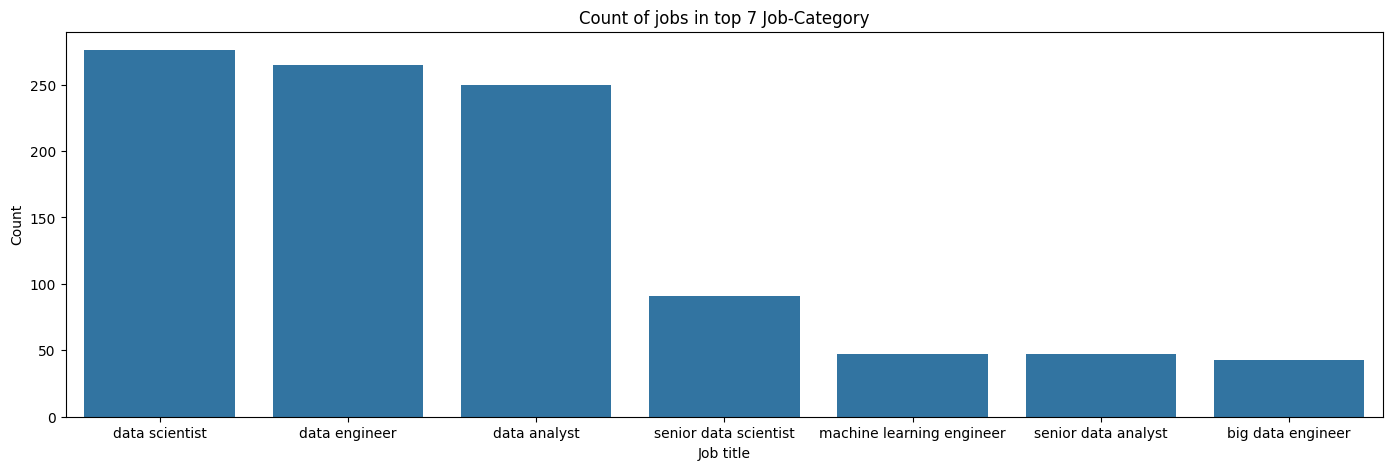

************************************

Category_counts of top 7 Company Name based on number of job posting--- 
 company name
Apple\n4.1                               60
IBM\n3.7                                 57
Amazon\n3.9                              47
Staffigo Technical Services, LLC\n5.0    28
Facebook\n4.5                            25
Diverse Lynx\n3.9                        25
Solekai Systems Corp\n4.2                24
Name: count, dtype: int64


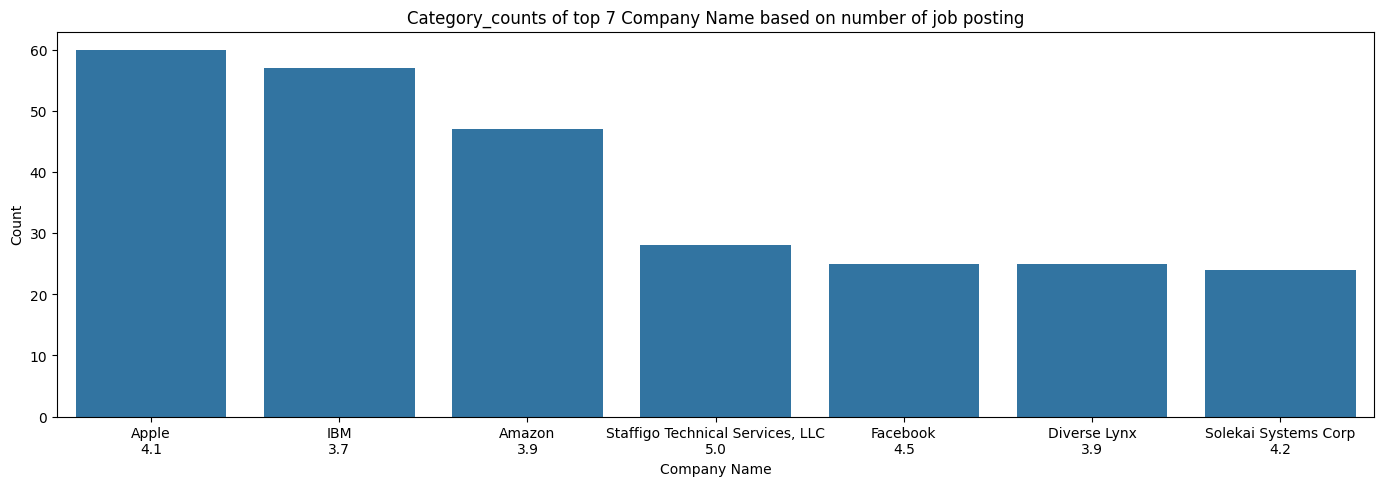

************************************

Category_counts of top 6 Industry based on number of job posting--- 
 sector
Information Technology       1124
Business Services             679
unknown                       546
Biotech & Pharmaceuticals     293
Finance                       270
Health Care                   197
Name: count, dtype: int64


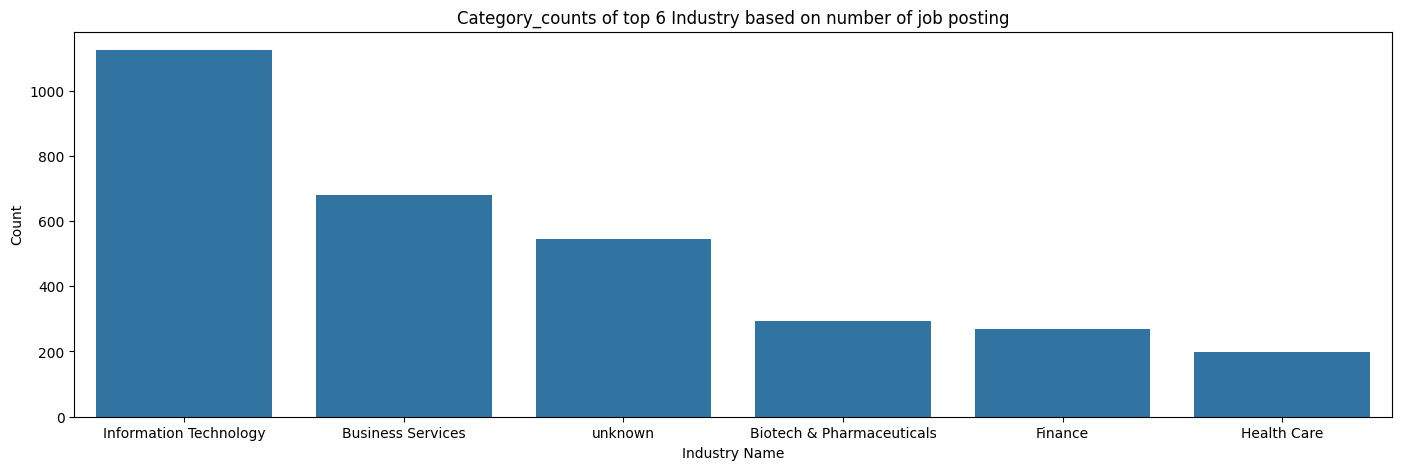

************************************



In [4]:
#(1) Top job titles (look at 'Job Title' column). Generate a plot to visualize top 5 job titles based on the number of postings for that same job title.
category_counts_job=df['normalized job title'].value_counts()
category_counts_job_top5= category_counts_job.head(7)
print(f'Category_counts of top 7 job titles--- \n {category_counts_job_top5}')
# Create the bar plot using Seaborn:
plt.figure(figsize=(17, 5)) 
sns.barplot(x=category_counts_job_top5.index, y=category_counts_job_top5.values)
# Add titles and labels for clarity:
plt.title('Count of jobs in top 7 Job-Category')
plt.xlabel('Job title')
plt.ylabel('Count')
#Display the plot
plt.show()
print('************************************\n')

#(2) Top companies (look at 'Company Name' column). Generate a plot to visualize top 5 companies based on the number of job postings.
category_counts_company_name=df['company name'].value_counts()
category_counts_company_name_top5= category_counts_company_name.head(7)
print(f'Category_counts of top 7 Company Name based on number of job posting--- \n {category_counts_company_name_top5}')
# Create the bar plot using Seaborn:
plt.figure(figsize=(17, 5)) 
sns.barplot(x=category_counts_company_name_top5.index, y=category_counts_company_name_top5.values)
# Add titles and labels for clarity:
plt.title('Category_counts of top 7 Company Name based on number of job posting')
plt.xlabel('Company Name')
plt.ylabel('Count')
#Display the plot
plt.show()
print('************************************\n')

#(3): Top Industry (look at 'Industry' column). Generate a plot to visualize top 5 industries based on the number of job postings linked to that industry.
df['sector']=df['sector'].str.replace('-1','unknown')
category_counts_industry=df['sector'].value_counts()
category_counts_industry_top5= category_counts_industry.head(6)
print(f'Category_counts of top 6 Industry based on number of job posting--- \n {category_counts_industry_top5}')
# Create the bar plot using Seaborn:
plt.figure(figsize=(17, 5)) 
sns.barplot(x=category_counts_industry_top5.index, y=category_counts_industry_top5.values)
# Add titles and labels for clarity:
plt.title('Category_counts of top 6 Industry based on number of job posting')
plt.xlabel('Industry Name')
plt.ylabel('Count')
#Display the plot
plt.show()
print('************************************\n')

#### Explanation and Findings:

* "job title" : I found 2048 different type of job titles even after the data-cleaning step. The top five categories are
  "data scientist", "data engineer","data analyst", "machine learning engineer" and "big data engineer".
* " Company name" : "Apple", "IBM" and "Amazon" are the three major companies that was hiring most candidates
* "Industry" : However while finding the industry where most of the people are hired, I found out that data was missing.

### 3.2 Salary Analysis
Distribution, central tendency, and top-paying job titles. Print out the mean, median and mode for job salaries. Generate a plot that shows salary distribution (this can be done for all positions collectively).

mean of Average salary = $108K
median of Average salary = $104K
mode of Average salary = $68.5K
top paying jobs--->
                                normalized job title  max_salary  avg_salary
2998                         data science researcher       250.0       225.0
2994       data scientist machine learning at google       250.0       225.0
2980                   diagnostic research scientist       250.0       225.0
2982                          senior hr data analyst       250.0       225.0
2983  machine learning engineer tiktok ads integrity       250.0       225.0
2984                                    data analyst       250.0       225.0


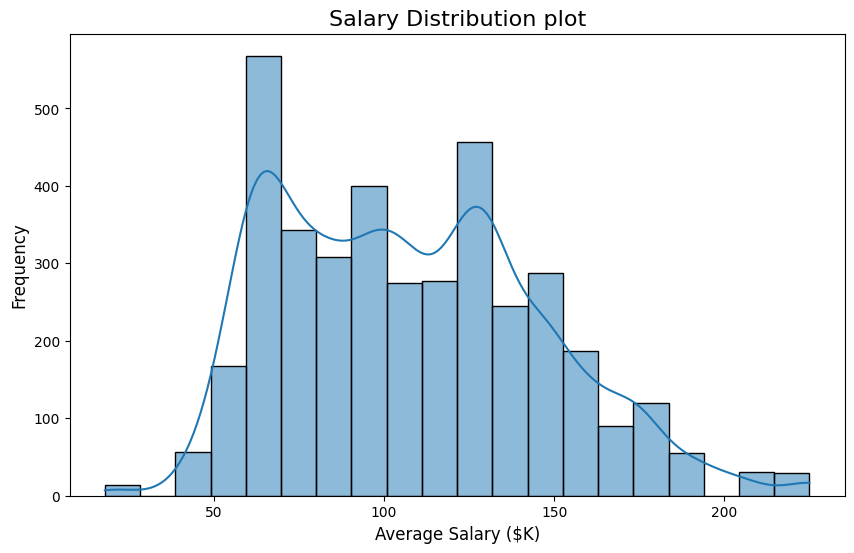

In [5]:
# Salary analysis:
#print(df.columns)
print(f'mean of Average salary = ${np.mean(df['avg_salary']):.0f}K')
print(f'median of Average salary = ${np.median(df['avg_salary']):.0f}K')
print(f'mode of Average salary = ${(df['avg_salary']).mode().iloc[0]}K')

# Top paying job title:
#df['max_salary'].value_counts()
# new data frame which sorts the jobs according to pay scale:
top_paying_jobs=df.sort_values(by='avg_salary',ascending=False)
print("top paying jobs--->")
print(top_paying_jobs[['normalized job title','max_salary','avg_salary']].head(6))

# Salary Analysis Distribution plot:
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary'], bins=20, kde=True)
plt.title('Salary Distribution plot', fontsize=16)
plt.xlabel('Average Salary ($K)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


#### salary analysis:
* Average salary is stored in the column "avg_salary".
* The maximum average salary is ~ $225K
* The median average salary is ~$104K. However most employees are getting an average salary around ~$68K.
* Data scientists are getting paid the most.
* The distribution of the average salary is bi-modal, two peaks being at ~$68K and ~$130K.

### 3.3 Remote vs. In-Person Jobs

Some job descriptions note that 'Work Remotely: Yes' which we can assume means this position is fully remote. Lets compare salary ranges for remote vs in-person positions for equivalent job titles.

number of unique location= 191
number of unique headquarters=542
remote jobs number = 2692
in_person jobs number =1217
remote job salary range max=$225.0K
remote job average salary =$106K
in_person job salary range max=$225.0K
in_person job avaerage salary =$112K
******************


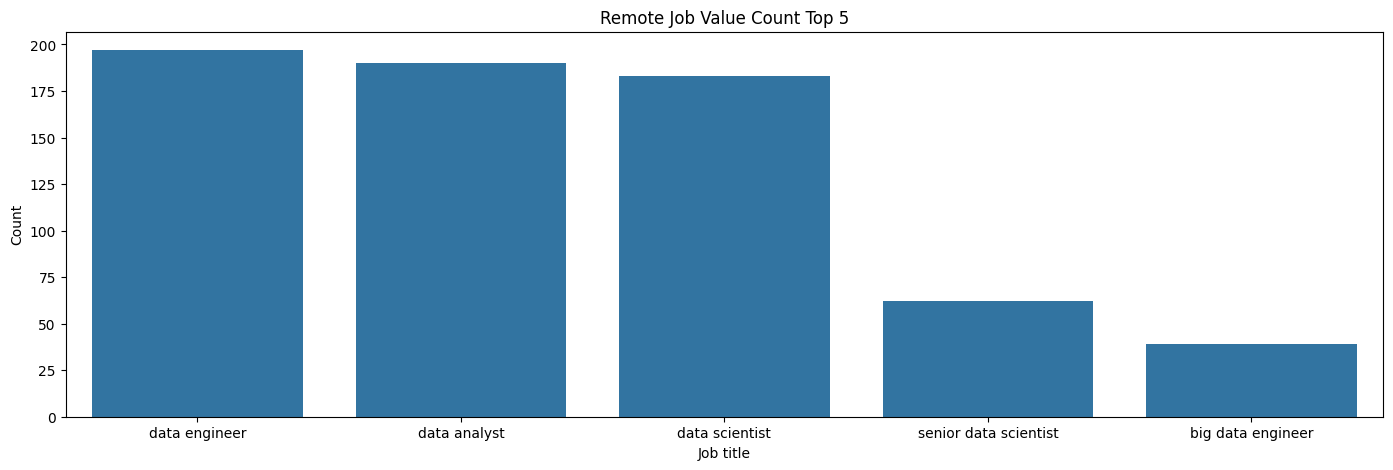

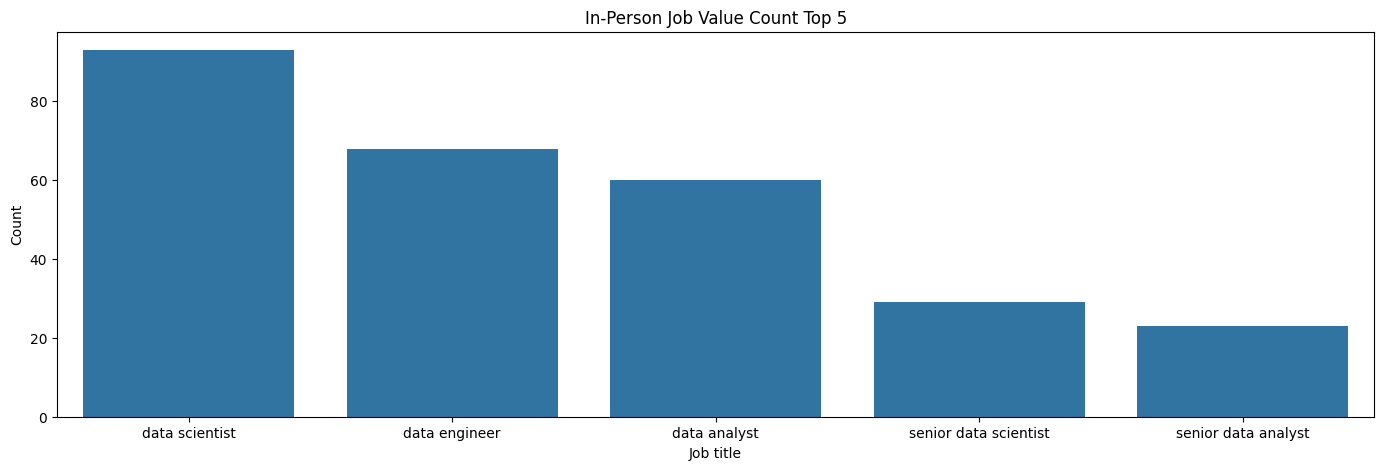

In [6]:
# TODO - your code goes here
df['location']=df['location'].str.lower().str.replace(',','')
df['headquarters']=df['headquarters'].str.lower().str.replace(',','')

print(f'number of unique location= {df['location'].nunique()}')
print(f'number of unique headquarters={df['headquarters'].nunique()}')

# remote jobs: 
condition=df['location']!=df['headquarters']
remote_df=df[condition]
#print(f'Number of remote locations={remote_df['location'].value_counts()}')
#print(remote_df[['location','headquarters']])
print(f'remote jobs number = {remote_df.shape[0]}')


#in person jobs:
in_person_df=df[df['location']==df['headquarters']]
#print(in_person_df[['location','headquarters']])
print(f'in_person jobs number ={in_person_df.shape[0]}')

print(f'remote job salary range max=${remote_df['avg_salary'].max()}K')
print(f'remote job average salary =${np.mean(remote_df['avg_salary']):0.0f}K')
print(f'in_person job salary range max=${in_person_df['avg_salary'].max()}K')
print(f'in_person job avaerage salary =${np.mean(in_person_df['avg_salary']):0.0f}K')

# Which job title has most remote jobs and most in_person jobs? :
print('******************')
#print('REMOTE JOBS VALUE COUNTS----->\n',remote_df['normalized job title'].value_counts())
#print('IN PERSON JOBS VALUE COUNTS----->\n',in_person_df['normalized job title'].value_counts())

rj_value_count=remote_df['normalized job title'].value_counts().head(5)
plt.figure(figsize=(17, 5)) 
sns.barplot(x=rj_value_count.index, y=rj_value_count.values)
# Add titles and labels for clarity:
plt.title('Remote Job Value Count Top 5')
plt.xlabel('Job title')
plt.ylabel('Count')
#Display the plot
plt.show()

ip_value_count=in_person_df['normalized job title'].value_counts().head(5)
plt.figure(figsize=(17,5))
sns.barplot(x=ip_value_count.index,y=ip_value_count.values)
# Add titles and labels for clarity:
plt.title('In-Person Job Value Count Top 5')
plt.xlabel('Job title')
plt.ylabel('Count')
#Display the plot
plt.show()


TODO - Findings (if any) goes here
* There are 191 unique job locations and 542 unique company headquarters. Thus comparing those I found out that-- number of remote jobs = 2692 and number of in_person jobs = 1217.
* For salary comparison: The average salary of the in_person jobs are tiny bit more than that of the remote jobs
* Data Engg posting has more remote jobs whereas Data Scientist position has more in-person jobs.

### 3.4 Location Distribution
Top locations and salary comparisons across locations.

- Perform analysis and visualize job postings by location. What are your findings?
- Visualize salary (for equivalent positions) by location. What are your findings?

number of unique job-locations=191


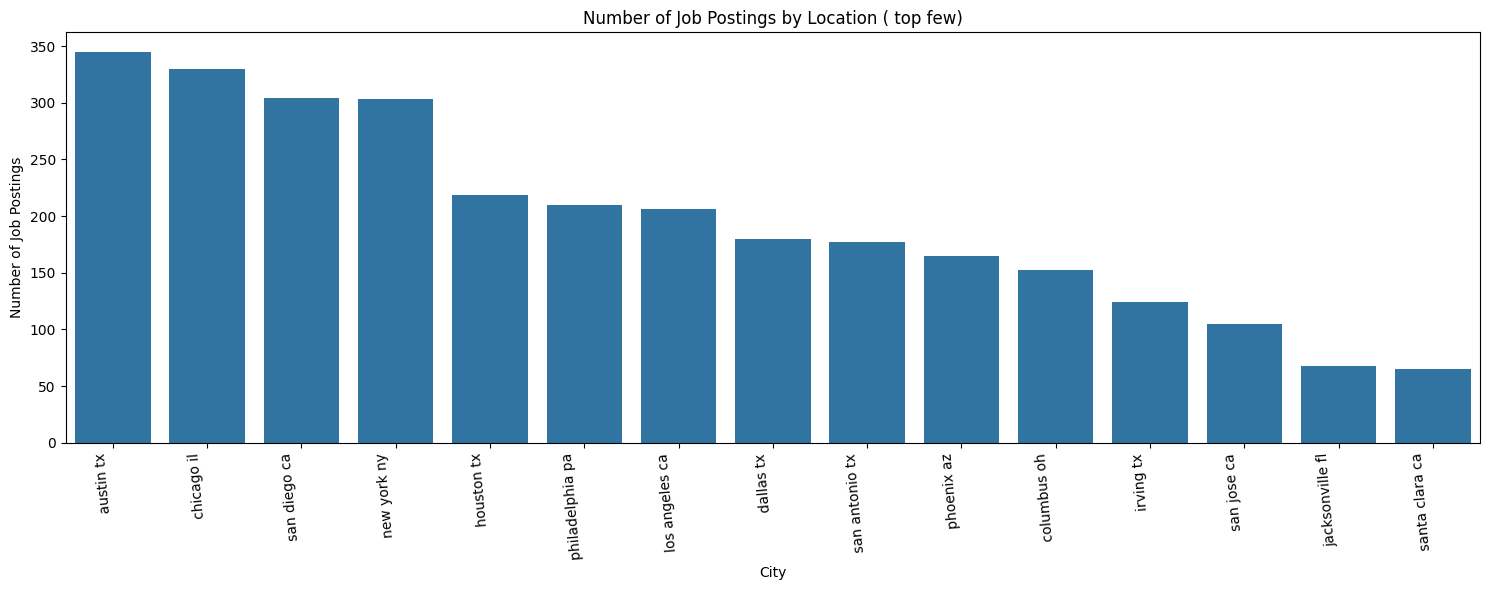

unique job titles---->['senior data scientist' 'data scientist product analytics'
 'data science manager' ... 'cyber security data engineer'
 'security analytics data engineer'
 'patient safety physician or safety scientist - uk europe or the us']
**************** 
 New Job data frame
location
new york ny         22
chicago il          10
los angeles ca       9
palo alto ca         5
sunnyvale ca         4
san jose ca          4
austin tx            4
newark nj            3
philadelphia pa      3
san diego ca         3
houston tx           2
newtown pa           2
mountain view ca     2
irving tx            2
redwood city ca      1
fremont ca           1
columbus oh          1
menlo park ca        1
newark ca            1
san antonio tx       1
dallas tx            1
fort lee nj          1
phoenix az           1
irwindale ca         1
sherman oaks ca      1
torrance ca          1
burbank ca           1
culver city ca       1
jersey city nj       1
gahanna oh           1
Name: count, dt

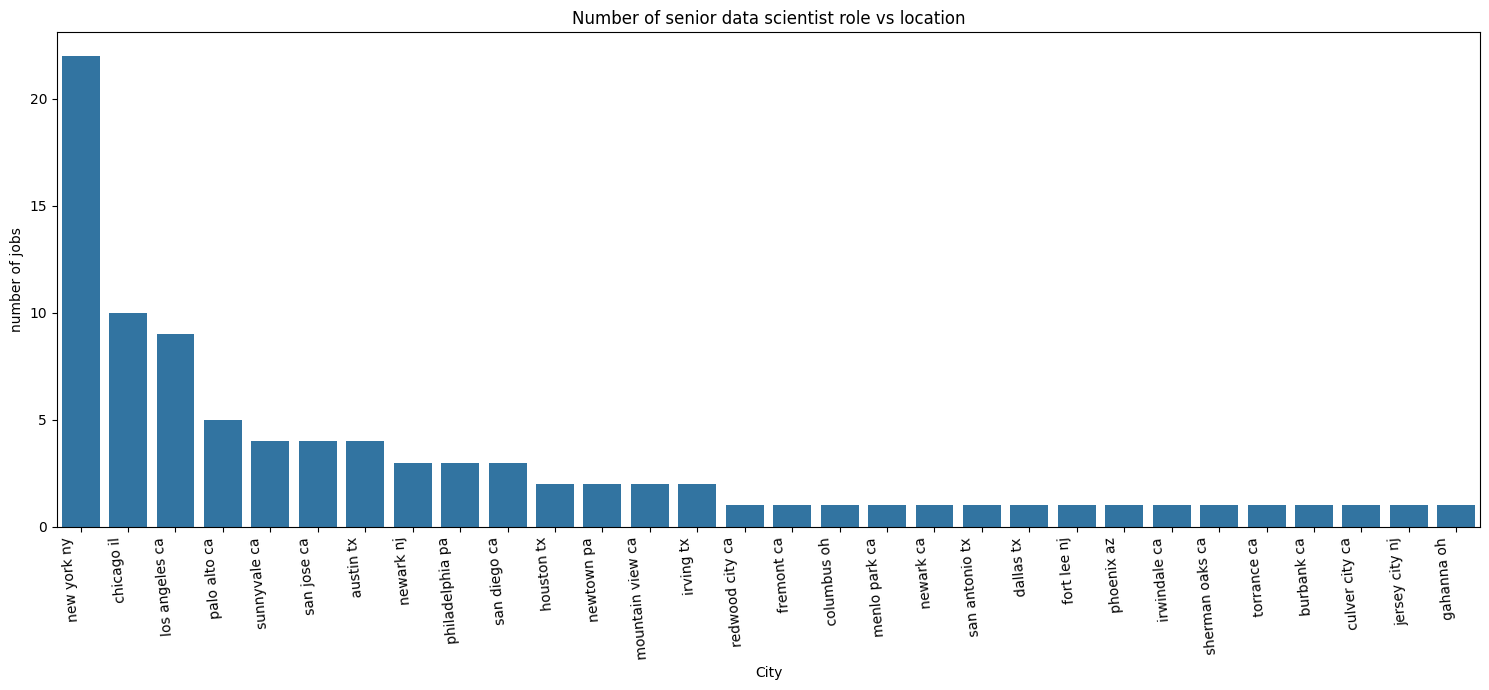

In [7]:
# TODO - your code goes here
# Visualize job postings by location:
print(f'number of unique job-locations={df['location'].nunique()}')
location_count=df['location'].value_counts().head(15) # top few locations
# Plot the results
plt.figure(figsize=(15, 6))
sns.barplot(x=location_count.index, y=location_count.values)
plt.title('Number of Job Postings by Location ( top few)')
plt.xlabel('City')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=95, ha='right')
plt.tight_layout()
plt.show()

## Visulaize salary (for equivalent positions) by locations: groupby(job-title)
#groupby_job_title=df.groupby('normalized job title')[['location','avg_salary']]
groupby_job_title=df.groupby('normalized job title')['location']
#print(groupby_job_title.get_group('data scientist').value_counts())
# print('**')
#print(groupby_job_title.value_counts())
job_array=df['normalized job title'].unique()
print(f'unique job titles---->{job_array}')
i=0;
job_df=groupby_job_title.get_group(job_array[i]).value_counts()
print('**************** \n New Job data frame')
print(job_df)
plt.figure(figsize=(15,7))
sns.barplot(x=job_df.index, y=job_df.values)
plt.title(f'Number of {job_array[i]} role vs location')
plt.xlabel('City')
plt.ylabel('number of jobs')
plt.xticks(rotation=95, ha='right')
plt.tight_layout()
plt.show()

    

TODO - Findings (if any) goes here

* Austin, TX has the most data science related jobs. A close competitor is Chicago, IL. However Newyork, NY has the most senior-data scientist jobs, almost double the number of jobs under the same job-title in next highest location Chicago, IL.

### 3.5 Skills Analysis
I focussed on the 'Data Scientist' job title.

In [8]:
# TODO - Code goes here
## Using the data frame we created in Step 2: data_scientist_jobs
data_scientist_jobs=data_scientist_jobs.copy()
data_scientist_jobs['job description']=data_scientist_jobs['job description'].str.lower()
# Define the list of skills to search for
skills = ['python', 'r', 'spark', 'hadoop', 'tableau', 'aws']

# Create a new column for each skill
for skill in skills:
    data_scientist_jobs[skill] = data_scientist_jobs['job description'].str.contains(skill, case=False, na=False)
    print(data_scientist_jobs[skill].value_counts())
print("DataFrame with new skill columns:")
print(data_scientist_jobs.columns)


python
True     832
False    152
Name: count, dtype: int64
r
True    984
Name: count, dtype: int64
spark
False    681
True     303
Name: count, dtype: int64
hadoop
False    781
True     203
Name: count, dtype: int64
tableau
False    798
True     186
Name: count, dtype: int64
aws
False    723
True     261
Name: count, dtype: int64
DataFrame with new skill columns:
Index(['unnamed: 0', 'index', 'job title', 'salary estimate',
       'job description', 'rating', 'company name', 'location', 'headquarters',
       'size', 'founded', 'type of ownership', 'industry', 'sector', 'revenue',
       'competitors', 'easy apply', 'salary', 'hourly_wage', 'min_salary',
       'max_salary', 'avg_salary', 'normalized job title', 'python', 'r',
       'spark', 'hadoop', 'tableau', 'aws'],
      dtype='object')


TODO - Findings (if any) goes here
* Everyone needs to know R, the next important skill is Python

### 3.6 Analysis
Is there any correlation between the type of  industry and the number of jobs and the salary range for those jobs? Generate some plots.

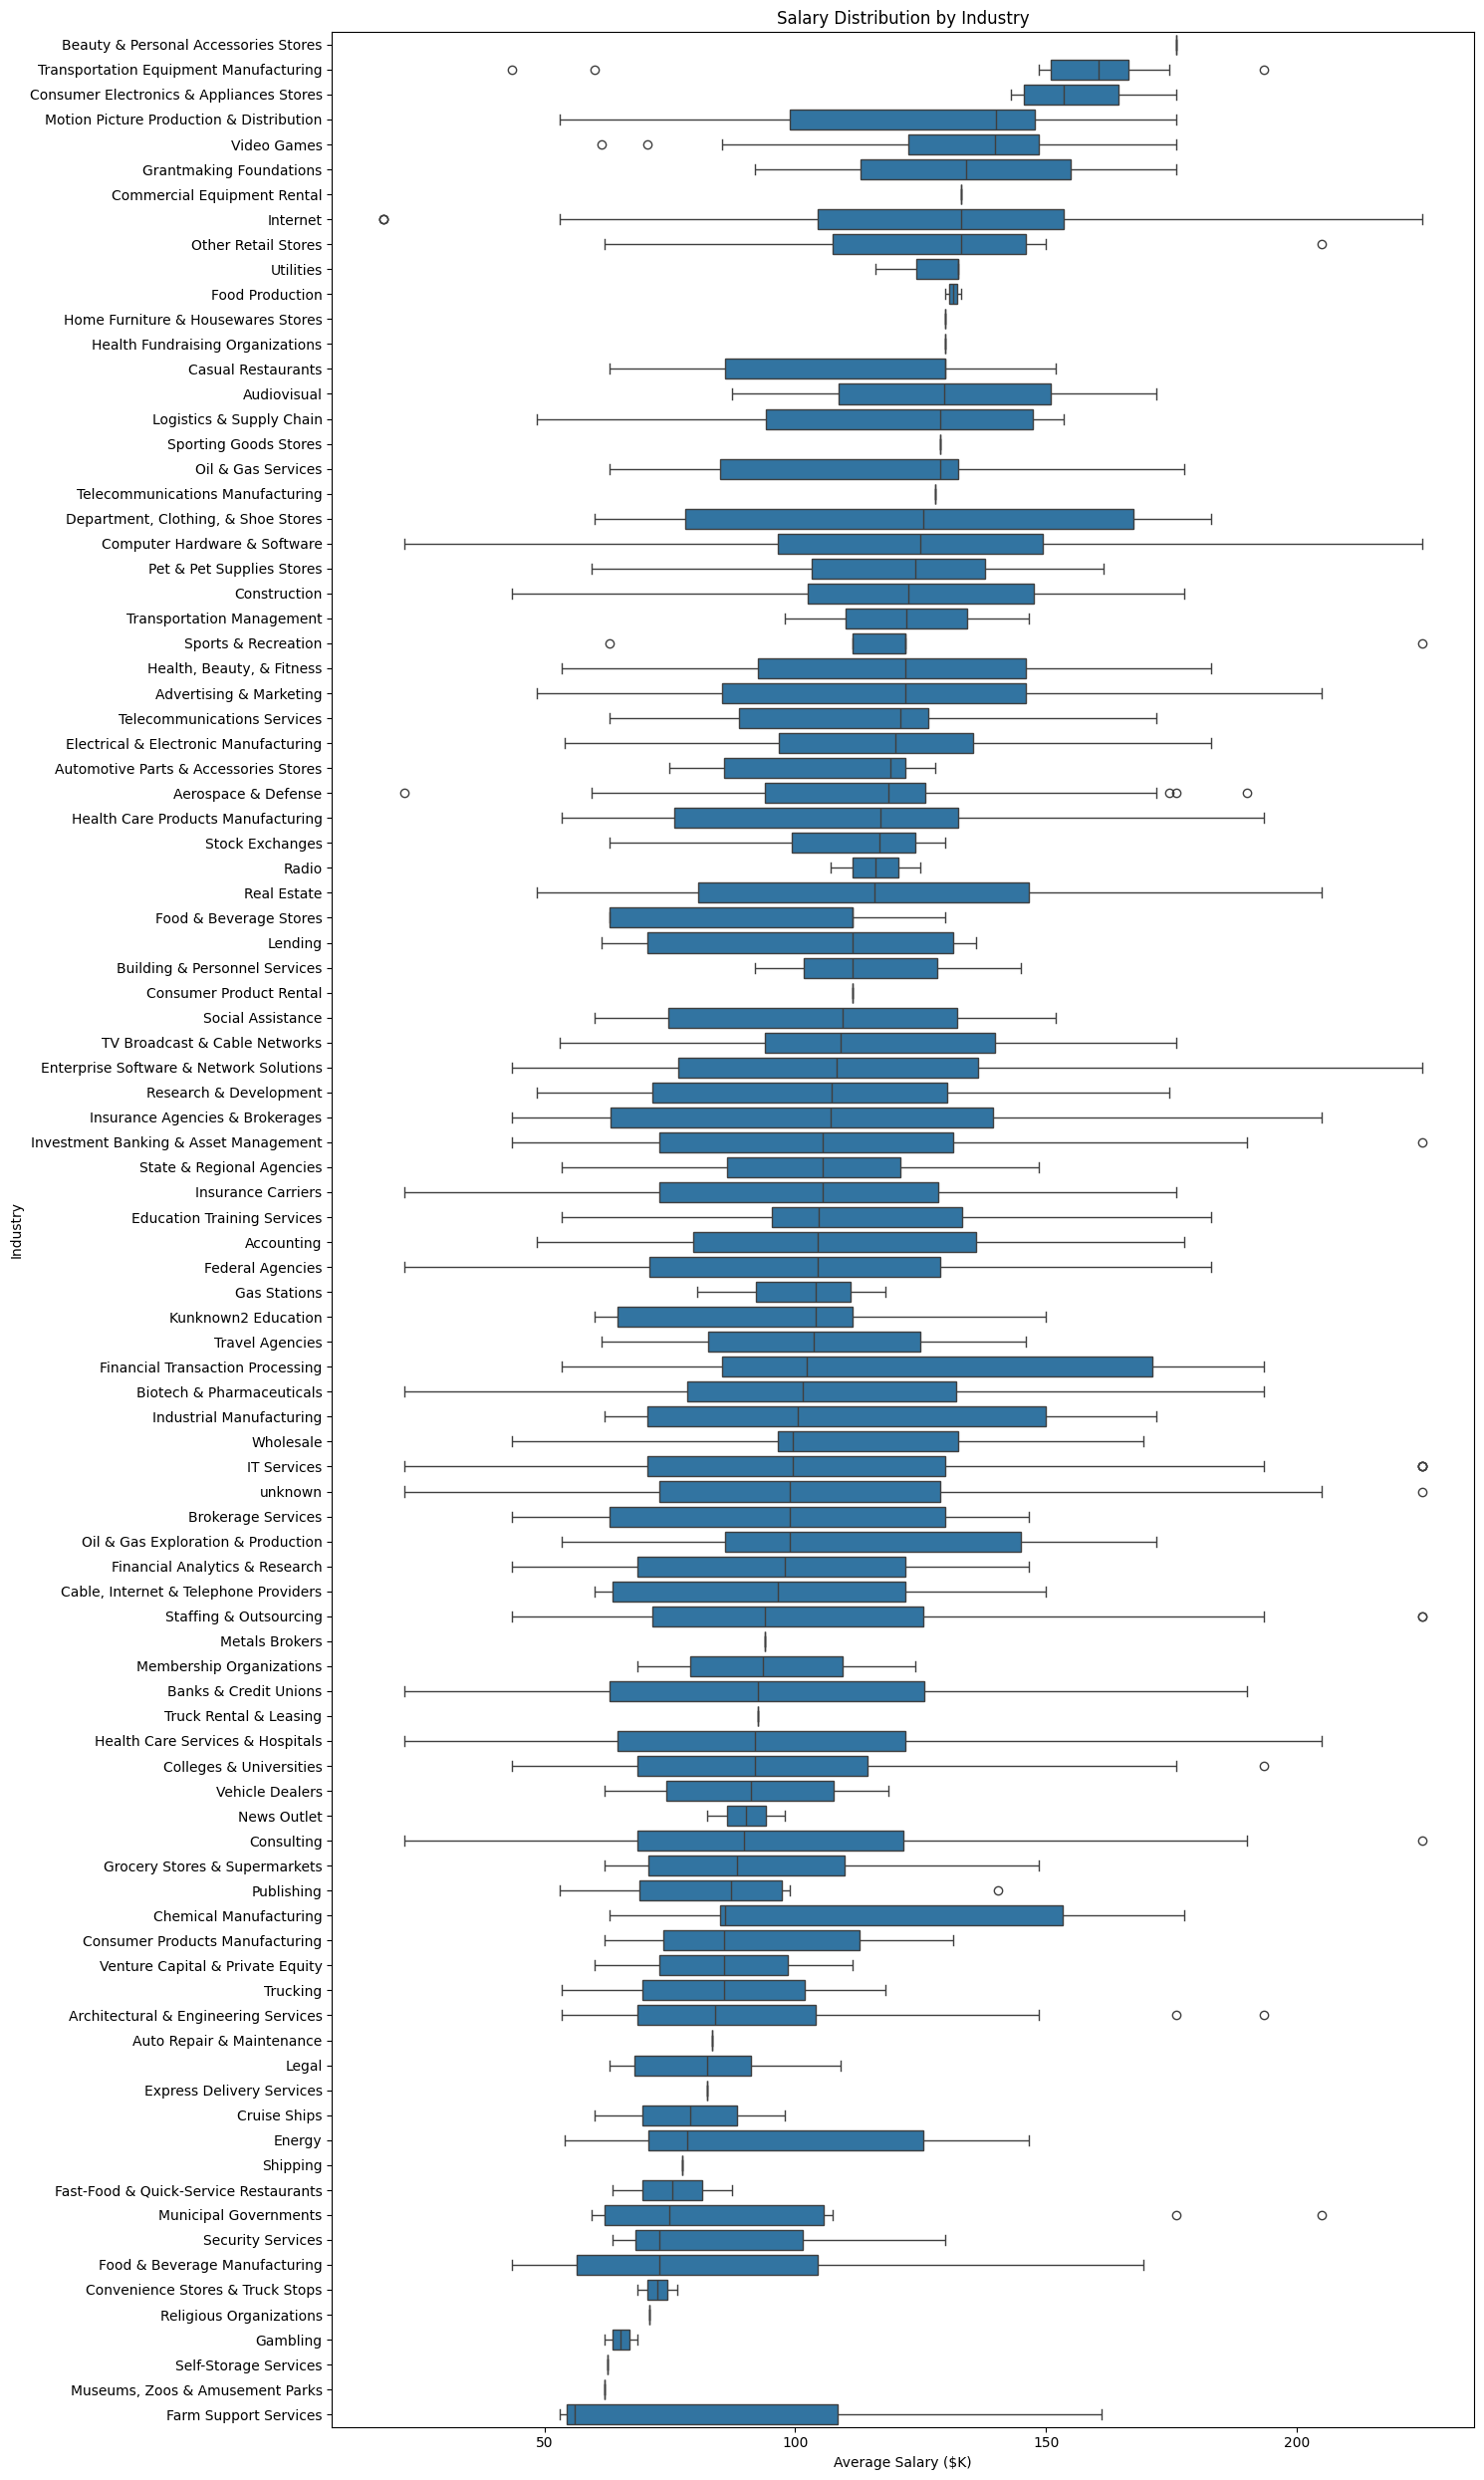

In [9]:
# TODO - Code goes here
## new data frame with industry and avg_salary

industry_df= df[['industry','avg_salary']].copy()
industry_df['industry']=industry_df['industry'].str.replace('-1','unknown')

# Create a box plot to show the salary distribution (range) for each industry sorted by median salary
plt.figure(figsize=(15, 25))
sns.boxplot(data=industry_df, x='avg_salary', y='industry', order=industry_df.groupby('industry')['avg_salary'].median().sort_values(ascending=False).index)
plt.title('Salary Distribution by Industry')
plt.xlabel('Average Salary ($K)')
plt.ylabel('Industry')
plt.tight_layout()
plt.show()

TODO - Findings (if any) goes here
* Highest median salary in the Transportation Equipment manufacturing industry.
* Computer Hardware and software industry has the largest range of median salary however has the most data point clustered around the mediad --- normal distribution.
* Farm Support services has the lowest median salary and is heavily right skewed, which means we can assume this industry group has an overall less payscale compared other industries.

## Step 4: More EDA
Example: Compare salary trends across seniority inferred from job title (entry vs senior). For each job posting, characterize job as either senior, mid or entry. Then determine salary range for each postion. Generate a plot to show how salaries compare.

DataFrame with new 'seniority' column:
                                              job title  avg_salary  seniority
0                                 Senior Data Scientist       146.0     Senior
1                     Data Scientist, Product Analytics       146.0  Mid-Level
2                                  Data Science Manager       146.0  Mid-Level
3                                          Data Analyst       146.0  Mid-Level
4                                Director, Data Science       146.0     Senior
...                                                 ...         ...        ...
3904                                  AWS Data Engineer        83.5  Mid-Level
3905                              Data Analyst â Junior        83.5     Junior
3906                   Security Analytics Data Engineer        83.5  Mid-Level
3907                   Security Analytics Data Engineer        83.5  Mid-Level
3908  Patient Safety Physician or Safety Scientist -...        83.5  Mid-Level

[3909 rows x

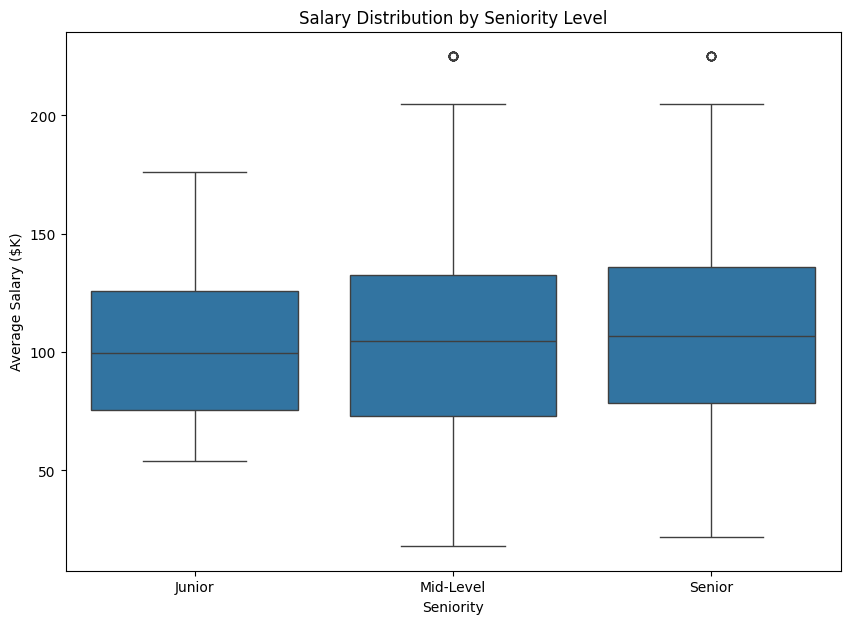

In [10]:
# TODO - Code goes here
def get_seniority(title):
    """Infers seniority level from a job title."""
    title = title.lower()
    if 'sr' in title or 'senior' in title or 'lead' in title or 'principal' in title or 'director' in title:
        return 'Senior'
    elif 'jr' in title or 'junior' in title:
        return 'Junior'
    else:
        return 'Mid-Level'

# Apply the function to create the new 'seniority' column
df['seniority'] = df['normalized job title'].apply(get_seniority)

print("DataFrame with new 'seniority' column:")
print(df[['job title', 'avg_salary', 'seniority']])
median_avg_salary_seniority=df.groupby('seniority')['avg_salary'].median()
print(f'********** \n Median avg salary($.K) based on seniority \n {median_avg_salary_seniority}')

# Define the logical order for the plot
seniority_order = ['Junior', 'Mid-Level', 'Senior']
#Box plot
plt.figure(figsize=(10, 7))
sns.boxplot(data=df, x='seniority', y='avg_salary', order=seniority_order)
# Add titles and labels
plt.title('Salary Distribution by Seniority Level')
plt.xlabel('Seniority')
plt.ylabel('Average Salary ($K)')
plt.show()

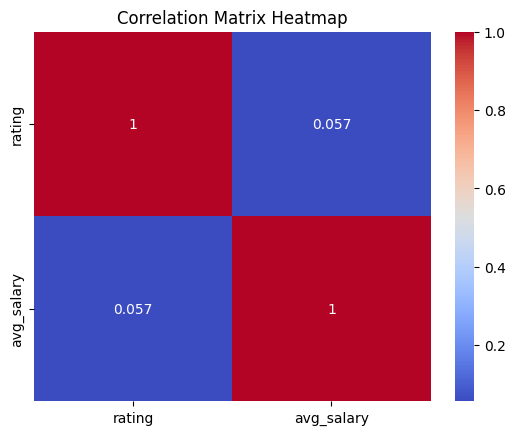

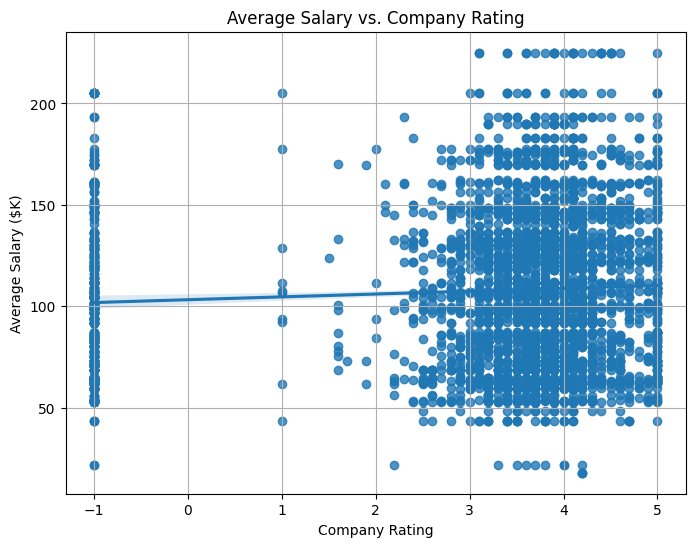

In [11]:
df_new= df[['rating','avg_salary']]
# Calculate the correlation matrix
corr_matrix = df_new.corr()

#Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Create a regression plot to visualize the correlation
plt.figure(figsize=(8, 6))
sns.regplot(data=df_new, x='rating', y='avg_salary')

plt.title('Average Salary vs. Company Rating')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary ($K)')
plt.grid(True)
plt.show()

TODO - Findings (if any) goes here

* Not much difference between the median avg_salary based "just" on seniority level
* strong positive corelation between the rating of the company the average salary.

## Step 5: Reflection

**Challenges faced:**  sr at the end. cleaning the job titile

**Key findings:**
* 3909 data points with 17 columns-- we focussed on JobTitle, Salary Estimate, Rating, Company Name, Location, Industry
* Most salary are given in "gross" form only 21 of them are given in "per hour" form
* Max(average salary) over all the roles ~ $225K
* Data-scientist position is most in demand
* Apple has most job postings
* Information Technology sector has the most job postings
* 2692 of the job postings were Remote (title : Data Engg, most in demand here)
* 1217 of the job postings were In-Person( title: Data Scientist, most in demand here)
* Austin, TX has the most job postings
* R and Python are the most in demand skill set.
* Seniority doesnot really affect the salary but Company-Ratings and salary increase are positively corelated.